In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from faker import Faker
from datetime import datetime, timedelta
import random

# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)
fake = Faker()
Faker.seed(42)

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [9]:
# Configuration
n_records = 500
products = ['Laptop', 'Phone', 'Tablet', 'Headphones', 'Monitor']
regions = ['North', 'South', 'East', 'West']

# Generate data
data = {
    'date': [fake.date_between(start_date='-1y', end_date='today') for _ in range(n_records)],
    'sales_rep': [fake.name() for _ in range(n_records)],
    'region': [random.choice(regions) for _ in range(n_records)],
    'product': [random.choice(products) for _ in range(n_records)],
    'quantity': [random.randint(1, 20) for _ in range(n_records)],
    'unit_price': [round(random.uniform(50, 1500), 2) for _ in range(n_records)],
}

# Create DataFrame
df = pd.DataFrame(data)

# Calculate revenue
df['revenue'] = df['quantity'] * df['unit_price']

# Sort by date
df = df.sort_values('date').reset_index(drop=True)

print(f"✅ Generated {len(df)} sales records")


# Calculate revenue by product
revenue_by_product = df.groupby('product')['revenue'].sum().sort_values(ascending=False)

✅ Generated 500 sales records


In [10]:
# Display first 10 rows
print("First 10 records:")
display(df.head(10))

# Display last 5 rows
print("\nLast 5 records:")
display(df.tail())

First 10 records:


,date,sales_rep,region,product,quantity,unit_price,revenue
0,2024-11-18,Robert Clarke,East,Phone,4,973.47,3893.88
1,2024-11-19,Olivia Ayers,West,Tablet,12,1171.64,14059.68
2,2024-11-20,Russell Murphy,North,Headphones,15,1083.47,16252.05
3,2024-11-21,Alyssa Haynes,North,Monitor,18,635.94,11446.92
4,2024-11-21,Kimberly Smith,North,Tablet,4,974.43,3897.72
5,2024-11-21,Robert Haynes,West,Laptop,7,1039.19,7274.33
6,2024-11-21,James Jefferson,West,Phone,20,572.31,11446.20
7,2024-11-22,Megan Green,South,Tablet,14,449.30,6290.20
8,2024-11-23,Shannon Miller,North,Tablet,19,1272.13,24170.47
9,2024-11-24,Vickie Anderson,West,Monitor,7,366.40,2564.80



Last 5 records:


,date,sales_rep,region,product,quantity,unit_price,revenue
495,2025-11-16,Derrick Brown,South,Laptop,8,649.01,5192.08
496,2025-11-16,Shannon Taylor,West,Tablet,2,1024.61,2049.22
497,2025-11-18,Jill Conway,South,Monitor,12,1130.60,13567.20
498,2025-11-18,David Walker,South,Laptop,18,326.34,5874.12
499,2025-11-18,Lindsay Lawson,East,Monitor,15,380.54,5708.10


In [6]:
print("=" * 60)
print("BASIC DATA EXPLORATION")
print("=" * 60)

# Dataset shape
print(f"\n📊 Dataset Shape: {df.shape}")
print(f"   - Rows: {df.shape[0]}")
print(f"   - Columns: {df.shape[1]}")

# Column names
print(f"\n📋 Columns: {list(df.columns)}")

# Data types
print(f"\n🔤 Data Types:")
display(df.dtypes)

# Check for missing values
print(f"\n❓ Missing Values:")
display(df.isnull().sum())

# Basic statistics
print(f"\n📈 Statistical Summary:")
display(df.describe())

BASIC DATA EXPLORATION

📊 Dataset Shape: (500, 7)
   - Rows: 500
   - Columns: 7

📋 Columns: ['date', 'sales_rep', 'region', 'product', 'quantity', 'unit_price', 'revenue']

🔤 Data Types:


date           object
sales_rep      object
region         object
product        object
quantity        int64
unit_price    float64
revenue       float64
dtype: object


❓ Missing Values:


date          0
sales_rep     0
region        0
product       0
quantity      0
unit_price    0
revenue       0
dtype: int64


📈 Statistical Summary:


,quantity,unit_price,revenue
count,500.000000,500.000000,500.000000
mean,10.596000,765.787280,8109.670280
std,5.806567,410.553554,6644.254137
min,1.000000,52.270000,61.860000
25%,5.000000,404.100000,2642.725000
50%,11.000000,746.180000,6335.495000
75%,15.000000,1093.960000,12155.450000
max,20.000000,1499.970000,29945.600000


In [11]:
print("=" * 60)
print("TOP PERFORMERS")
print("=" * 60)

# Top 10 sales representatives
print("\n🏆 Top 10 Sales Representatives:")
top_reps = df.groupby('sales_rep')['revenue'].sum().sort_values(ascending=False).head(10)
display(top_reps)

# Count of sales by product
print("\n📦 Number of Sales by Product:")
sales_count = df['product'].value_counts()
display(sales_count)

# Average quantity sold by region
print("\n📈 Average Quantity Sold by Region:")
avg_quantity = df.groupby('region')['quantity'].mean().sort_values(ascending=False)
display(avg_quantity)

TOP PERFORMERS

🏆 Top 10 Sales Representatives:


sales_rep
Chelsea Lewis      28552.00
Rebekah Greene     28083.52
Samantha Prince    27816.19
Reginald Diaz      27504.21
Erin Smith         27107.30
Colin Fletcher     26920.72
Cynthia Mueller    26869.80
Daniel Freeman     26025.44
Michael Cooper     25707.00
Megan Adams        25654.86
Name: revenue, dtype: float64


📦 Number of Sales by Product:


product
Laptop        104
Phone         102
Headphones    102
Tablet         96
Monitor        96
Name: count, dtype: int64


📈 Average Quantity Sold by Region:


region
South    10.816000
West     10.352518
North     9.957265
East      9.495798
Name: quantity, dtype: float64

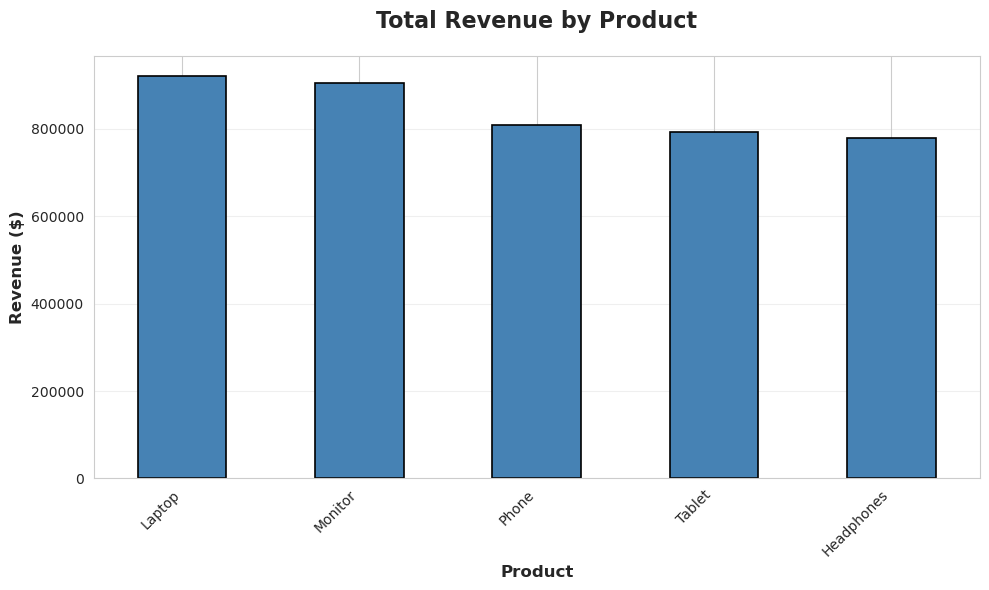

📊 Best Selling Product: Laptop ($921,445.34


In [12]:
# Revenue by Product - Bar Chart
plt.figure(figsize=(10, 6))
revenue_by_product.plot(kind='bar', color='steelblue', edgecolor='black', linewidth=1.2)
plt.title('Total Revenue by Product', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Product', fontsize=12, fontweight='bold')
plt.ylabel('Revenue ($)', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"📊 Best Selling Product: {revenue_by_product.index[0]} (${revenue_by_product.values[0]:,.2f}")

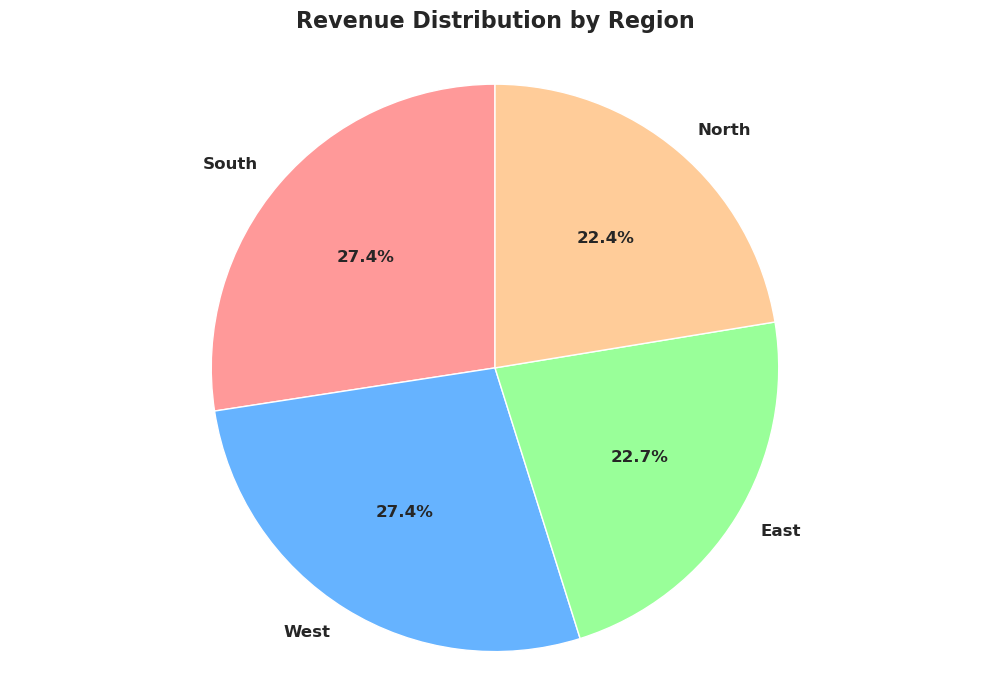

🌟 Best Performing Region: South ($1,154,401.49)


In [14]:
# Calculate revenue by region
revenue_by_region = df.groupby('region')['revenue'].sum().sort_values(ascending=False)
# Revenue by Region - Pie Chart
plt.figure(figsize=(10, 7))
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
plt.pie(revenue_by_region, labels=revenue_by_region.index, autopct='%1.1f%%', 
        colors=colors, startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
plt.title('Revenue Distribution by Region', fontsize=16, fontweight='bold', pad=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

print(f"🌟 Best Performing Region: {revenue_by_region.index[0]} (${revenue_by_region.values[0]:,.2f})")

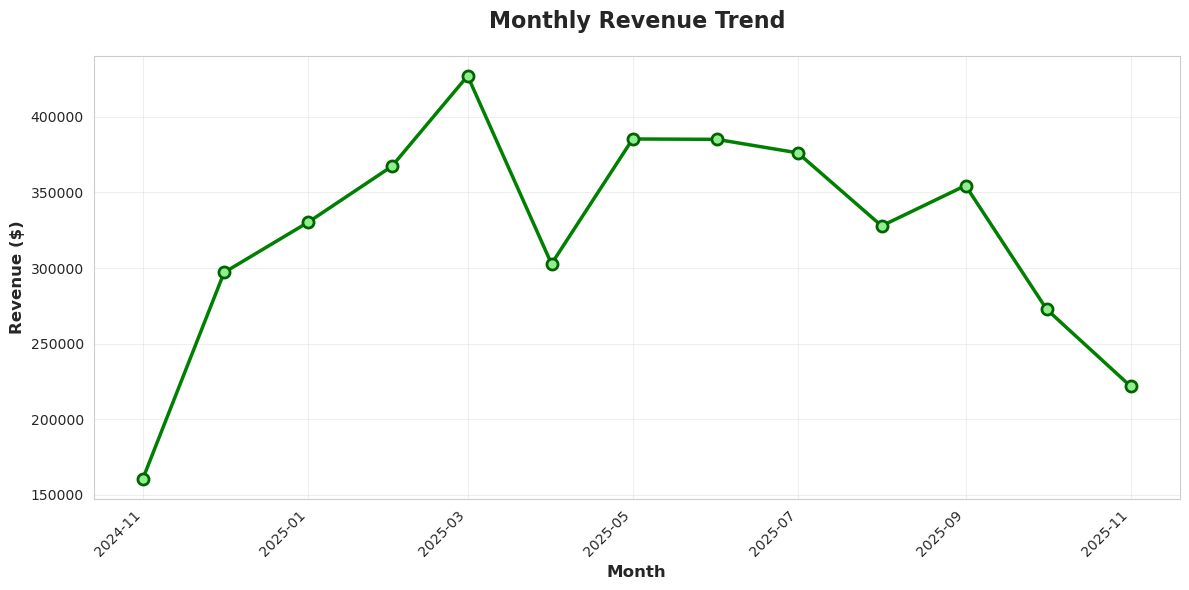

📈 Peak Month: March 2025 ($427,000.52)


In [15]:
# Prepare monthly data
df['month'] = pd.to_datetime(df['date']).dt.to_period('M')
monthly_revenue = df.groupby('month')['revenue'].sum()
monthly_revenue.index = monthly_revenue.index.to_timestamp()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue.index, monthly_revenue.values, 
         marker='o', linewidth=2.5, color='green', markersize=8, 
         markerfacecolor='lightgreen', markeredgecolor='darkgreen', markeredgewidth=2)
plt.title('Monthly Revenue Trend', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Month', fontsize=12, fontweight='bold')
plt.ylabel('Revenue ($)', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"📈 Peak Month: {monthly_revenue.idxmax().strftime('%B %Y')} (${monthly_revenue.max():,.2f})")

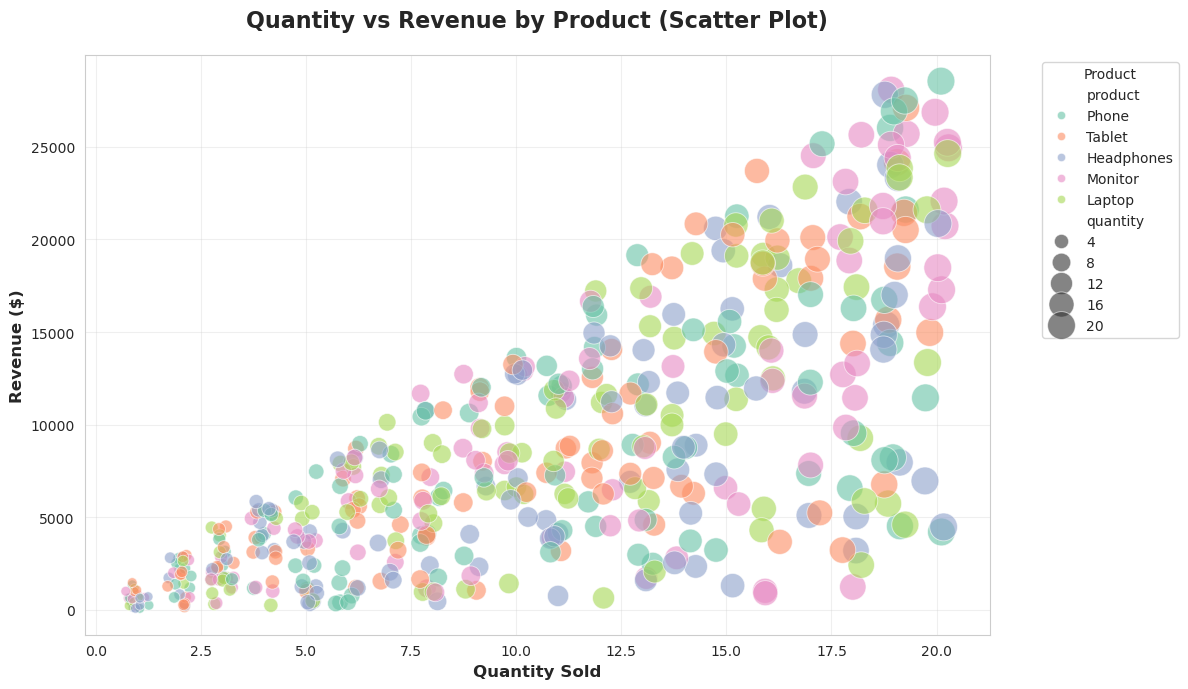

In [22]:
# SCATTER PLOT: Quantity vs Revenue by Product
# Add jitter for better visualization
df['quantity_jitter'] = df['quantity'] + np.random.uniform(-0.3, 0.3, len(df))

plt.figure(figsize=(12, 7))
sns.scatterplot(data=df, x='quantity_jitter', y='revenue', hue='product', 
                size='quantity', sizes=(50, 400), alpha=0.6, palette='Set2')
plt.title('Quantity vs Revenue by Product (Scatter Plot)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Quantity Sold', fontsize=12, fontweight='bold')
plt.ylabel('Revenue ($)', fontsize=12, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Product', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Pivot Table (Product vs Region Revenue):


region,East,North,South,West
product,,,,
Headphones,130224.31,236803.48,258458.46,153428.36
Laptop,239750.96,199162.85,191560.98,290970.55
Monitor,222124.03,215588.03,213066.07,255158.43
Phone,182729.64,134385.75,214629.72,277866.51
Tablet,181990.51,157287.11,276686.26,176484.14


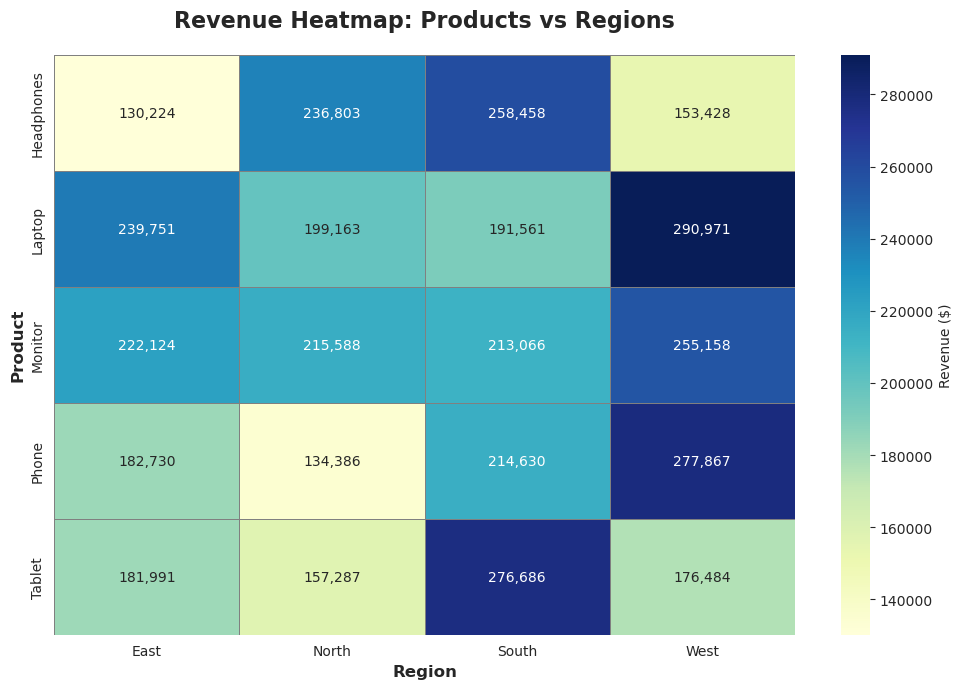

In [17]:
# Create pivot table for heatmap
pivot_table = df.pivot_table(
    values='revenue',
    index='product',
    columns='region',
    aggfunc='sum',
    fill_value=0
)

print("Pivot Table (Product vs Region Revenue):")
display(pivot_table)

# HEATMAP: Product vs Region Revenue
plt.figure(figsize=(10, 7))
sns.heatmap(pivot_table, annot=True, fmt=',.0f', cmap='YlGnBu', 
            linewidths=0.5, linecolor='gray', cbar_kws={'label': 'Revenue ($)'})
plt.title('Revenue Heatmap: Products vs Regions', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Region', fontsize=12, fontweight='bold')
plt.ylabel('Product', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

/tmp/ipykernel_248/1170731455.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='region', y='revenue', palette='Set2', linewidth=2)


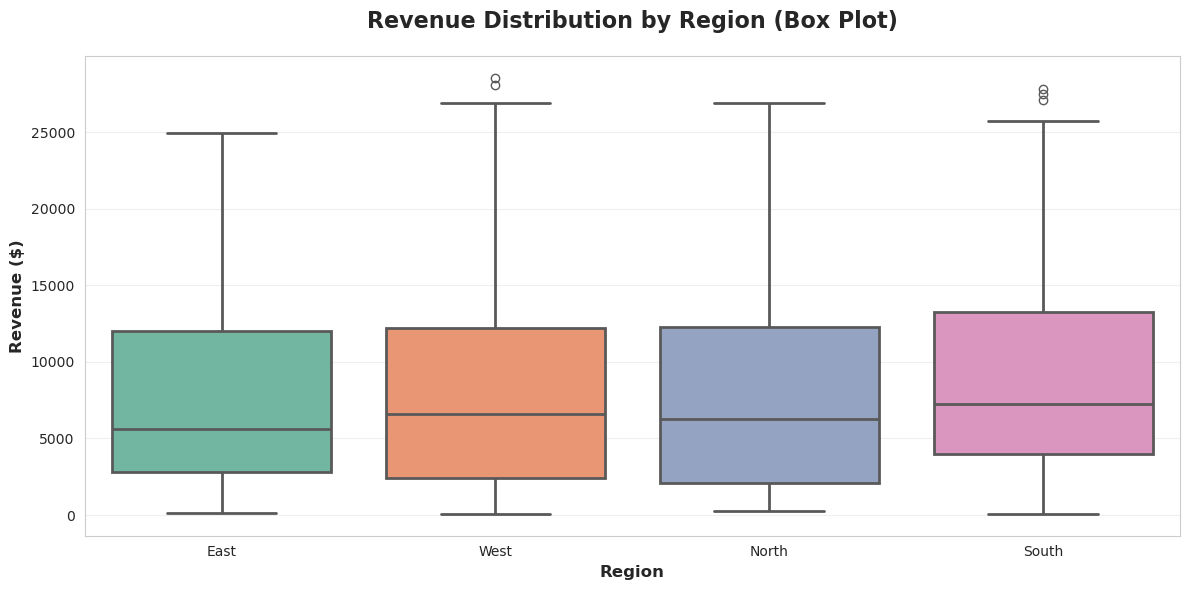


📊 Revenue Statistics by Region:


,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
East,119.0,8040.499580,6857.962461,131.50,2838.755,5592.60,12015.945,24951.40
North,117.0,8061.771111,6745.915214,242.14,2064.660,6239.00,12303.850,26869.80
South,125.0,9235.211920,7138.816672,77.73,4013.640,7262.86,13244.900,27816.19
West,139.0,8301.496331,7116.603443,75.77,2403.655,6572.70,12233.575,28552.00


In [18]:
# Box Plot: Revenue distribution by region
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='region', y='revenue', palette='Set2', linewidth=2)
plt.title('Revenue Distribution by Region (Box Plot)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Region', fontsize=12, fontweight='bold')
plt.ylabel('Revenue ($)', fontsize=12, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Statistics by region
print("\n📊 Revenue Statistics by Region:")
display(df.groupby('region')['revenue'].describe())

/tmp/ipykernel_248/3438468155.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='product', palette='viridis', edgecolor='black', linewidth=1.2)


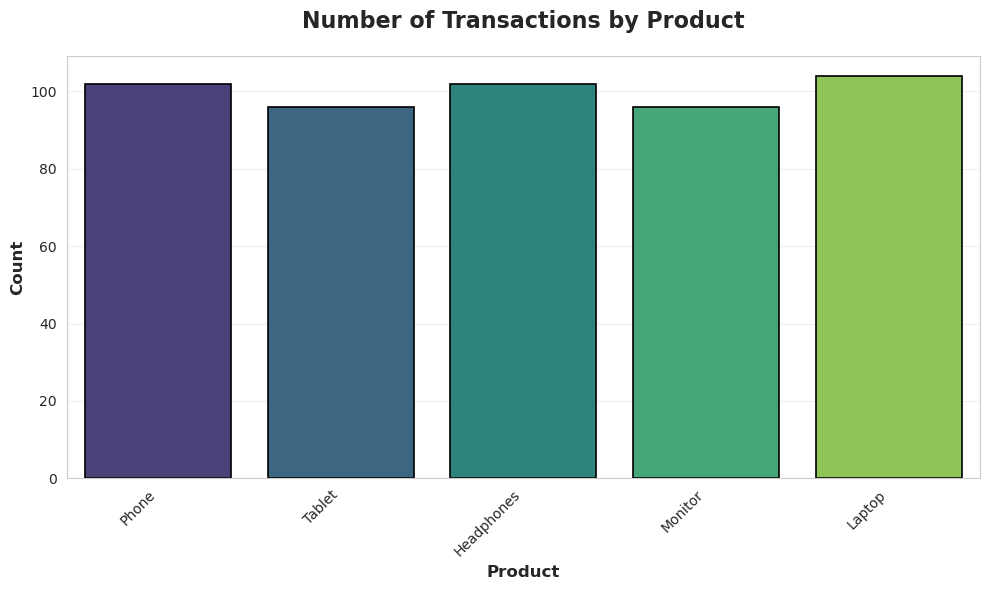

In [19]:
# Count Plot: Number of transactions by product
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='product', palette='viridis', edgecolor='black', linewidth=1.2)
plt.title('Number of Transactions by Product', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Product', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

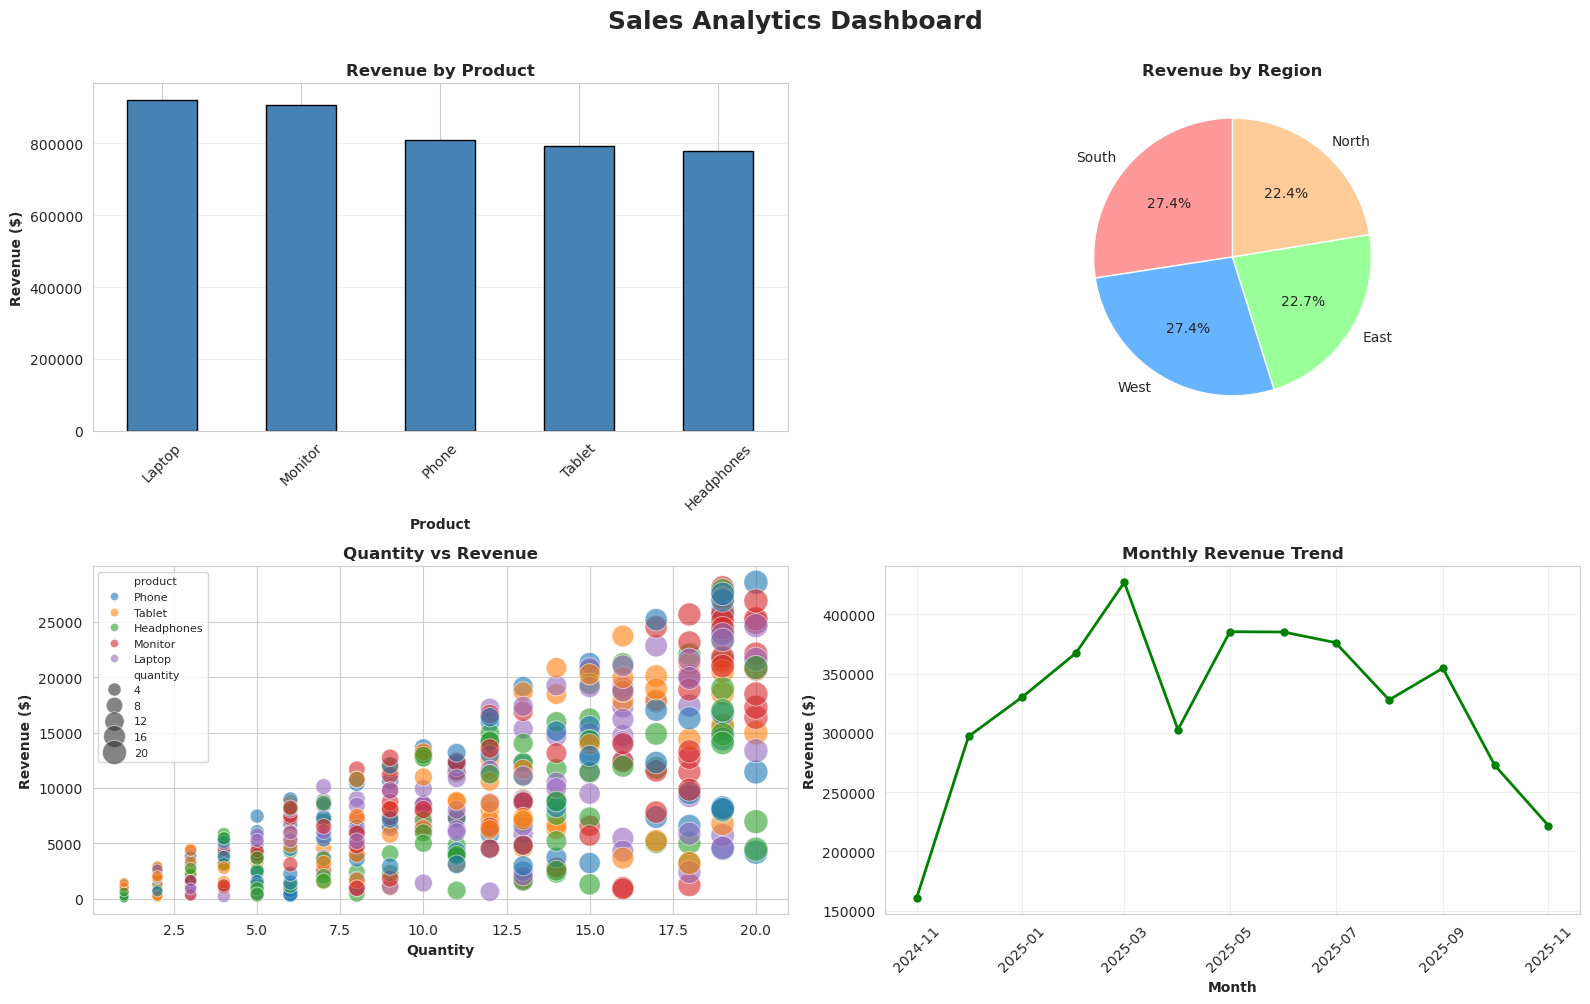

In [20]:
# Create comprehensive dashboard
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Sales Analytics Dashboard', fontsize=18, fontweight='bold', y=1.00)

# Plot 1: Revenue by Product
revenue_by_product.plot(kind='bar', ax=axes[0, 0], color='steelblue', edgecolor='black')
axes[0, 0].set_title('Revenue by Product', fontweight='bold', fontsize=12)
axes[0, 0].set_xlabel('Product', fontweight='bold')
axes[0, 0].set_ylabel('Revenue ($)', fontweight='bold')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis='y', alpha=0.3)

# Plot 2: Revenue by Region (Pie)
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
axes[0, 1].pie(revenue_by_region, labels=revenue_by_region.index, autopct='%1.1f%%', 
               colors=colors, startangle=90)
axes[0, 1].set_title('Revenue by Region', fontweight='bold', fontsize=12)

# Plot 3: Scatter Plot
sns.scatterplot(data=df, x='quantity', y='revenue', hue='product', 
                size='quantity', sizes=(50, 300), alpha=0.6, ax=axes[1, 0])
axes[1, 0].set_title('Quantity vs Revenue', fontweight='bold', fontsize=12)
axes[1, 0].set_xlabel('Quantity', fontweight='bold')
axes[1, 0].set_ylabel('Revenue ($)', fontweight='bold')
axes[1, 0].legend(fontsize=8, loc='upper left')

# Plot 4: Monthly Trend
axes[1, 1].plot(monthly_revenue.index, monthly_revenue.values, 
                marker='o', linewidth=2, color='green', markersize=5)
axes[1, 1].set_title('Monthly Revenue Trend', fontweight='bold', fontsize=12)
axes[1, 1].set_xlabel('Month', fontweight='bold')
axes[1, 1].set_ylabel('Revenue ($)', fontweight='bold')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

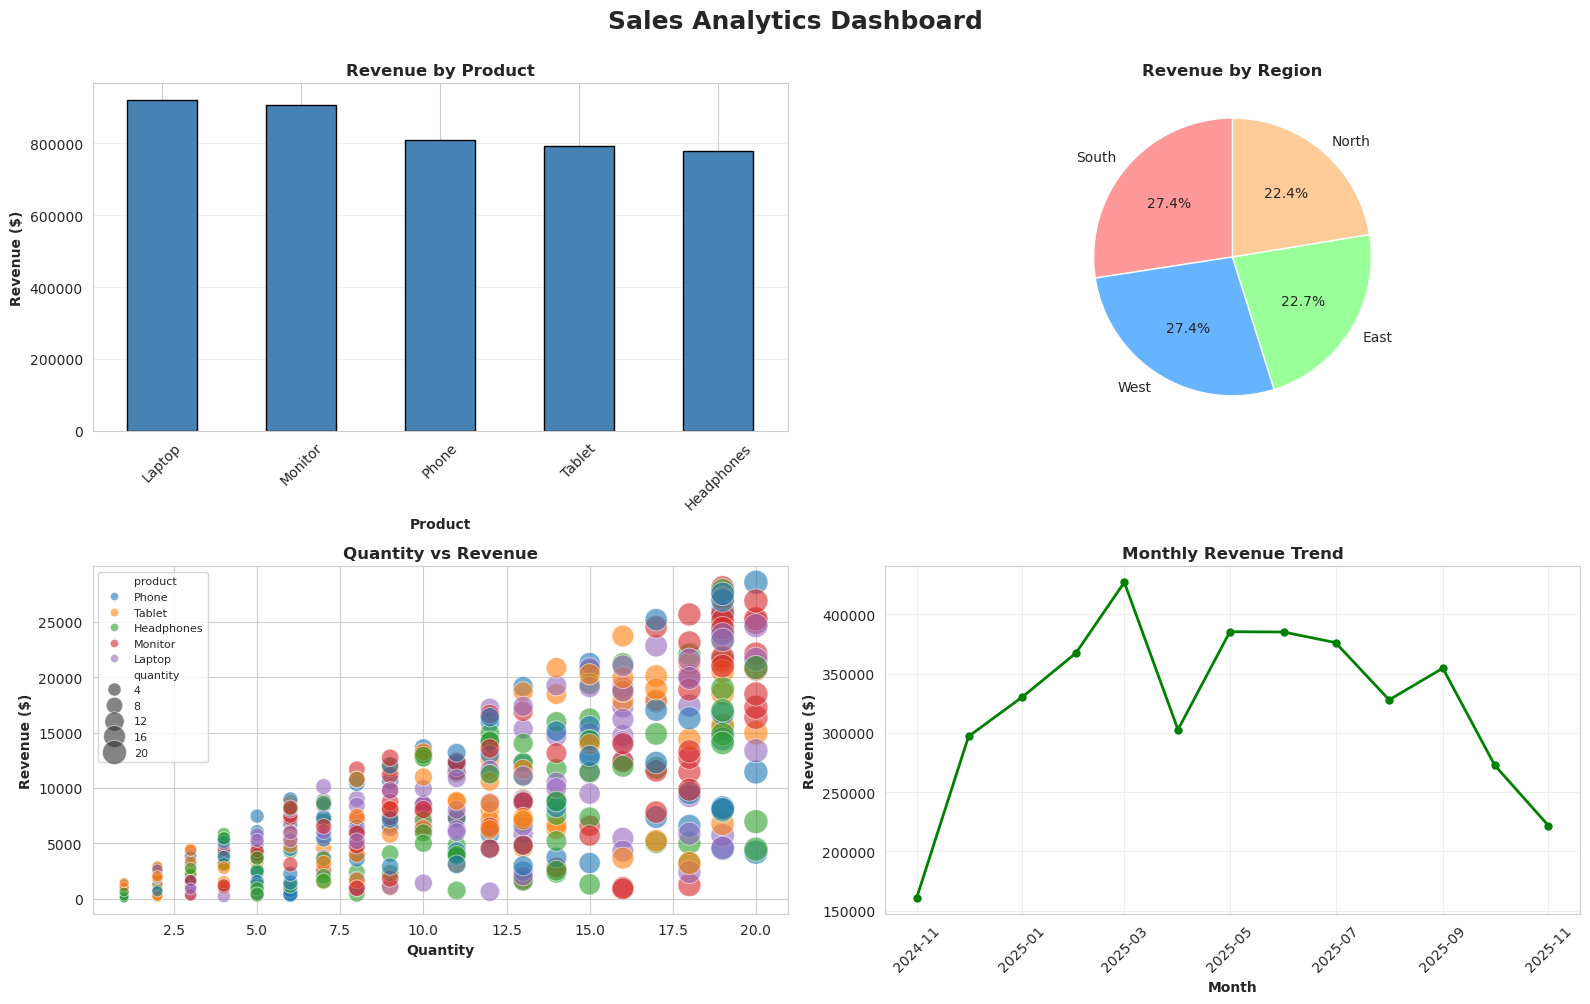

In [21]:
# Create comprehensive dashboard
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Sales Analytics Dashboard', fontsize=18, fontweight='bold', y=1.00)

# Plot 1: Revenue by Product
revenue_by_product.plot(kind='bar', ax=axes[0, 0], color='steelblue', edgecolor='black')
axes[0, 0].set_title('Revenue by Product', fontweight='bold', fontsize=12)
axes[0, 0].set_xlabel('Product', fontweight='bold')
axes[0, 0].set_ylabel('Revenue ($)', fontweight='bold')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis='y', alpha=0.3)

# Plot 2: Revenue by Region (Pie)
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
axes[0, 1].pie(revenue_by_region, labels=revenue_by_region.index, autopct='%1.1f%%', 
               colors=colors, startangle=90)
axes[0, 1].set_title('Revenue by Region', fontweight='bold', fontsize=12)

# Plot 3: Scatter Plot
sns.scatterplot(data=df, x='quantity', y='revenue', hue='product', 
                size='quantity', sizes=(50, 300), alpha=0.6, ax=axes[1, 0])
axes[1, 0].set_title('Quantity vs Revenue', fontweight='bold', fontsize=12)
axes[1, 0].set_xlabel('Quantity', fontweight='bold')
axes[1, 0].set_ylabel('Revenue ($)', fontweight='bold')
axes[1, 0].legend(fontsize=8, loc='upper left')

# Plot 4: Monthly Trend
axes[1, 1].plot(monthly_revenue.index, monthly_revenue.values, 
                marker='o', linewidth=2, color='green', markersize=5)
axes[1, 1].set_title('Monthly Revenue Trend', fontweight='bold', fontsize=12)
axes[1, 1].set_xlabel('Month', fontweight='bold')
axes[1, 1].set_ylabel('Revenue ($)', fontweight='bold')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()